## 01 Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# In order to access the dataset, we need to create a path
path = r'C:\Users\Ratul\anaconda_projects\Machine Learning\Weather Stations'

In [3]:
# Import the weather data
X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_clean.csv'), index_col = False)

In [4]:
# Import predictions data

Y = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [6]:
X.shape

(22950, 137)

In [7]:
Y.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Y.shape

(22950, 16)

## 02 Data Wrangling

In [9]:
#Reduce observations dataset to 2010's
X_dec = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
X_dec

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [10]:
#Reduce the list to the Belgrade weather station data

X_mad = list(x for x in X_dec.columns if x.find('MADRID') >=0)
X_mad

['MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max']

In [11]:
# Create a df with those columns

df = X[X_mad]
df

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.00,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.00,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.00,7.8,12.1,8.2,16.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.52,1.0204,1.89,0.12,5.3,20.0,16.2,23.9
22946,8,0.51,1.0221,1.89,0.12,3.9,19.1,14.7,23.5
22947,8,0.46,1.0186,1.89,0.12,8.1,19.0,15.4,22.6
22948,5,0.66,1.0186,1.89,0.12,3.1,15.7,13.1,18.3


In [12]:
#Reduce answers dataset for Heathrow 

y_mad = Y['MADRID_pleasant_weather']
y_mad

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MADRID_pleasant_weather, Length: 22950, dtype: int64

In [13]:
#Checking Shape
df.shape

(22950, 9)

In [14]:
y_mad.shape

(22950,)

## 03 Reshaping for modeling

In [15]:
X2 = df

In [16]:
y2 = y_mad

In [17]:
# Turn X and y from a df to arrays

X = np.array(X2)
y = np.array(y2)

In [18]:
X.shape

(22950, 9)

In [19]:
y.shape

(22950,)

## 04 Data Split 

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 05 Random Forest Model

In [22]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


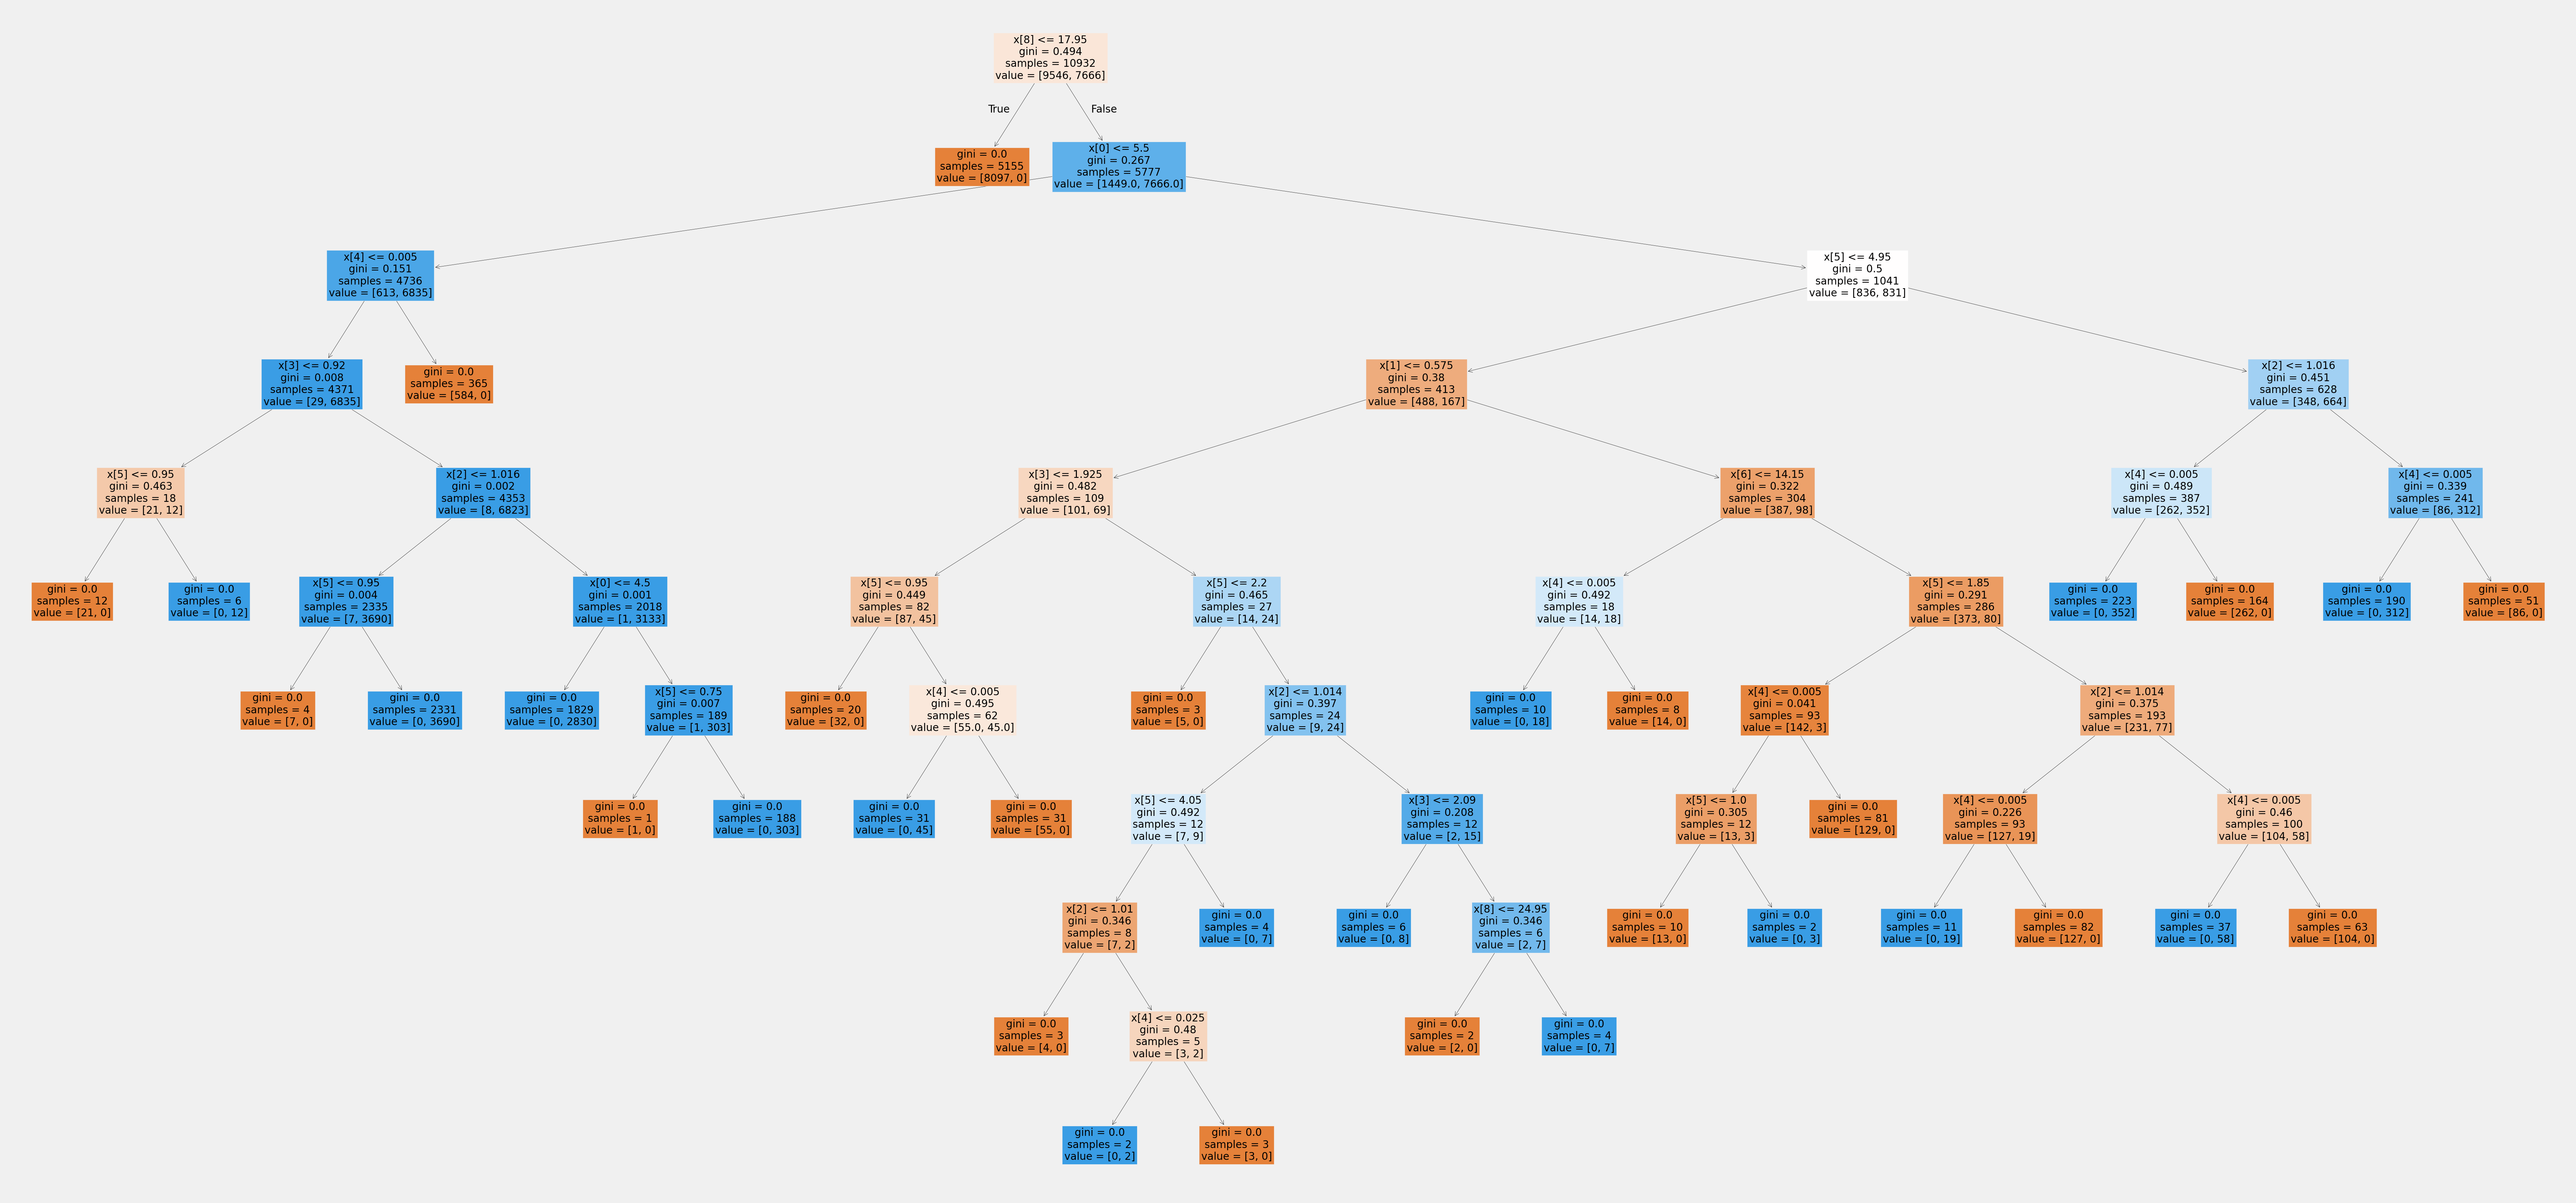

In [33]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[11], fontsize = 20, filled=True);
fig

In [34]:
fig.savefig(os.path.join(path, '04 Analysis', 'madrid_forest_2010s.png'),bbox_inches='tight')

## 06 Uncovering Feature Importances

In [35]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01707783, 0.03300415, 0.00363554, 0.06672153, 0.21509638,
       0.06123154, 0.21187867, 0.07471349, 0.31664087])

In [36]:
#Create list of weather parameters

w_list = [feature.replace('MADRID_', '') for feature in X_mad]
w_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [37]:
important = pd.Series(newarray, index = X_mad)
important

MADRID_cloud_cover         0.017078
MADRID_humidity            0.033004
MADRID_pressure            0.003636
MADRID_global_radiation    0.066722
MADRID_precipitation       0.215096
MADRID_sunshine            0.061232
MADRID_temp_mean           0.211879
MADRID_temp_min            0.074713
MADRID_temp_max            0.316641
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


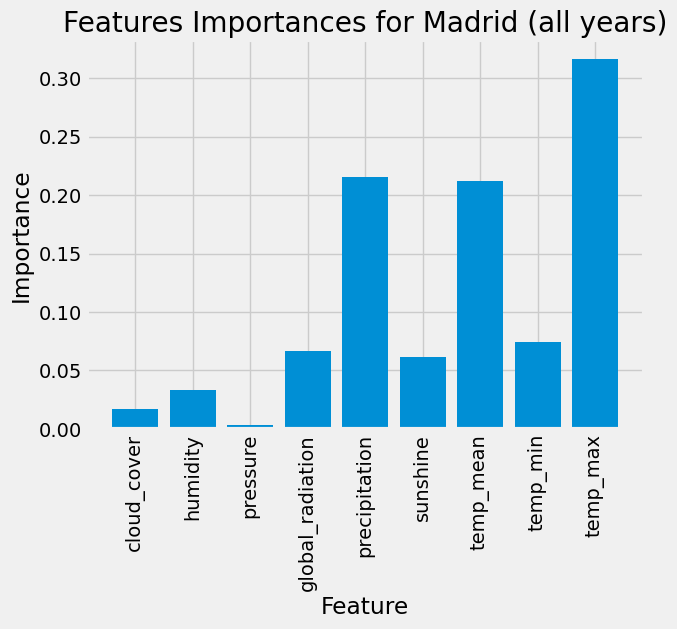

In [39]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(w_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, w_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Madrid (all years)');

plt.savefig(os.path.join(path, '04 Analysis', 'Madrid_importances.png'), bbox_inches='tight')
plt.show()